# EDA Package
 
## 1. [numcat](#Splitting the Data)
## 2. [outliers_imputation](#outlier)
## 3. [missing_values](#missing value)

## numcat Function:

### 1. splitting the Numerical and categorical Variabels from the given dataset
### 2. Plotting Histogram,box plot for numerical.
### 3. Plotting barplot for categorical variable
### 4. Information about the outliers

In [18]:

def numcat(data):
    
    # A) Splitting the numerical and categorical variables:
    #-------------------------------------------------------
    
    #libraries
    import os
    import numpy as np
    from termcolor import colored
    import pandas as pd
    
    numerical = []
    categorical = []
    column = [col for col in data.columns]
    for variable in column:
        ratio = len(np.unique(data[variable]))/len(data[variable])
        if  (ratio >= 0.004) and ((data[variable].dtype == 'int64')or(data[variable].dtype == 'float64')):
            numerical.append(variable)
        else:
            categorical.append(variable)
    
    num=numerical
    cat=categorical 

    print (colored('\033[1m' + 'Numerical Features are: \n' + '\033[0m', 'blue'))
    print(numerical)

    print (colored('\033[1m' + 'Categorical Features are: \n' + '\033[0m', 'blue'))
    print(categorical)
    
    remove=["date","dat","Date","Dat"]
    
    # B) plotting the graphs:
    #------------------------
    
    #libraries
    import matplotlib.pyplot as plt
    import seaborn as sns
    
    #function for saving the plotted graph
    def save(variable,plttype):
        plt.xlabel(variable)
        plt.savefig(plttype+"_"+variable+'.png')
        
    resp = str(input("Do you want to save the images (Y/N)  : "))
    
    # C) Function to find the percentage of outlier in the dataset(numerical) :
    #---------------------------------------------------------------------------
                
    def outliers(data,num):
        res=pd.DataFrame()
        for variable in num:
            q1 = np.percentile(data[variable],25)
            q3 = np.percentile(data[variable],75)
            iqr = q3-q1
            outlier = len(data[data[variable] > (q3 + 1.5*iqr)]) + len(data[data[variable] < (q1 - 1.5*iqr)])
            ratio = (outlier/len(data)) * 100
            res = res.append({"Variable":variable,"% of Outliers":ratio,"Count" : outlier}, ignore_index=True)
            res=res.iloc[:, ::-1]
        res=pd.DataFrame(res,index=np.arange(1,len(res)))
        return(res)
    
    #Displaying the graphs and outlier outputs
    
    if ((resp == 'Y') or (resp == 'y')):
        
        dire=str(input("Give the path information : ")) # getting the directory to save the graphs
        temp=os.getcwd() # for getting the current working directory
        os.chdir(dire) # changing the directory to suggested path
        
        # plotting and storing the graph for numerical variables 
        
        print (colored('\033[1m' + '\n Graphs of Numerical variables :' + '\033[0m', 'blue'))
        for variable in num:
            if variable not in remove:
                data.boxplot(column= variable ,grid=False, figsize=(5,5))
                save(variable,"boxplot")
                plt.show()
                data.hist(column=variable,bins=20,grid=False,edgecolor="green")
                save(variable,"hist")
                plt.show()
                
        #Plotting and storing the graph for categorical variable
        
        print (colored('\033[1m' + 'Graphs of Categorical variables :' + '\033[0m', 'blue'))
        for variable in cat:
            if variable not in remove:
                try:
                    sns.countplot(x=variable,data=data)
                    save(variable,"barplot")
                    plt.show()
                except:
                    print("Cannot plot the graph for the feature variable",variable)
            else:
                continue
        os.chdir(temp)
        
        print (colored('\033[1m' + ' \n Outlier Analysis : ' + '\033[0m', 'blue'))        
        print(outliers(data,num))
    else: 
        # plotting the graph for numerical variables
        
        print (colored('\033[1m' + 'Graphs of Numerical variables :' + '\033[0m', 'blue'))
        for variable in num:
            if variable not in remove:
                data.boxplot(column= variable ,grid=False, figsize=(5,5))
                plt.show()
                data.hist(column=variable,bins=20,grid=False,edgecolor="green")
                plt.show()
        
        #Plotting the graph for categorical variable

        print (colored('\033[1m' + 'Graphs of Categorical variables :' + '\033[0m', 'blue'))
        for i in cat:
            if i not in remove:
                try:
                    sns.countplot(x=i,data=house)
                    plt.show()
                except:
                    print("Cannot plot the graph for the feature variable",i)
            else:
                continue
            
        print (colored('\033[1m' + ' \n Outlier Analysis : ' + '\033[0m', 'blue'))        
        print(outliers(data,num))


## Outlier_Imputation Function:
### PLOTTING THE BOX PLOT BEFORE AND AFTER OUTLIER TREATMENT
### METHODS USED FOR TREATING OUTLIERS

### 1. REMOVING THE OUTLIERS
### 2. LOGARTHMIC TRANSFORMATION OF THE VARIABLES
### 3. SQUARE ROOT TRANSFORMATION
### 4. WINSORIZATION METHOD
### 5. LOGARTHMIC TRANSOFRMATION AND WINSORIZATION

In [2]:






def outliers_imputation(data, num):
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    from termcolor import colored
    
    #getting the details about the outliers
    def outliers(data,num):
        res=pd.DataFrame()
        for variable in num:
            q1 = np.percentile(data[variable],25)
            q3 = np.percentile(data[variable],75)
            iqr = q3-q1
            outlier = len(data[data[variable] > (q3 + 1.5*iqr)]) + len(data[data[variable] < (q1 - 1.5*iqr)])
            ratio = (outlier/len(data)) * 100
            res = res.append({"Variable":variable,"% of Outliers":ratio,"Count" : outlier}, ignore_index=True)
            res=res.iloc[:, ::-1]
        res=pd.DataFrame(res,index=np.arange(1,len(res)))
        return(res)
    
    res=outliers(data,num)
    
    var = list(res[res.Count!=0].Variable)
    
    o=pd.DataFrame()
    
    for variable in var:
        q1 = np.percentile(data[variable],25)
        q3 = np.percentile(data[variable],75)
        mea = np.mean(data[variable])
        std = np.std(data[variable])
        
        iqr = q3-q1
        
        print (colored('\033[1m' + 'Box plot before Transformation :' + '\033[0m', 'green'))
        print (colored('\033[1m' + "Box plot for "+variable+" :" + '\033[0m', 'blue'))
        data.boxplot(column= variable ,grid=False, figsize=(5,5),whis=1.5)
        plt.show()
        
        while 1:
            print('Different types of outlier transformation: \n ')
            print('\t \t   1.Remove outliers \n                   2.Logarithmic transformation of the variable \n                   3.Sqrt Transformation \n                   4. Winsorization \n                   5. Winsorization of Transformation variable')
            
            x= str(input(('Enter your option: (1,2,3,4,5): ')))
            
            # 1. REMOVING THE OUTLIERS:
            
            if (x == "1"):
                tempd = data.copy()
                m="Removed"
                #data=data[(data[variable]<(q3+(1.5*iqr))) & (data[variable]>(q1-(1.5*iqr)))]
                tempd=tempd[(tempd[variable]<(mea+(1.8*std))) & (tempd[variable]>(mea-(1.8*std)))]
                print (colored('\033[1m' + '\n Box plot after removal of outliers:' + '\033[0m', 'green'))
                tempd.boxplot(column= variable ,grid=False, figsize=(5,5),whis=1.5)
                plt.show()
                
                y=input("are you okay with treatment of outliers (Y/N): ")
                if ((y == 'Y') or (y == 'y')):
                    data=tempd.copy()
                    o = o.append({"Variable":variable,"Outlier Treatment":m}, ignore_index=True)
                    break
                else:
                    continue
                    
            # 2. LOGRATHMIC TRANSFORMATION OF THE VARIABLES: 
            
            elif(x == '2'):
                tempd = data.copy()
                m="Log Transformation"
                tempd[variable] = np.log(tempd[(variable)])
                
                print (colored('\033[1m' + '\n Box plot after removal of outliers:' + '\033[0m', 'green'))
                tempd.boxplot(column= variable ,grid=False, figsize=(5,5))
                plt.show()
                y=input("are you okay with treatment of outliers (Y/N): ")
                if ((y == 'Y') or (y == 'y')):
                    data = tempd.copy()
                    o = o.append({"Variable":variable,"Outlier Treatment":m}, ignore_index=True)
                    break
                else:
                    continue
                    
            # 3. SQUARE ROOT TRANSFORMATION:
            
            elif(x == '3'):
                tempd = data.copy()
                tempd[variable] = np.sqrt(tempd[(variable)])
                m="SQRT Transformation"
                print (colored('\033[1m' + '\n Box plot after removal of outliers:' + '\033[0m', 'green'))
                tempd.boxplot(column= variable ,grid=False, figsize=(5,5))
                plt.show()
                y=input("are you okay with treatment of outliers (Y/N): ")
                if ((y == 'Y') or (y == 'y')):
                    data = tempd.copy()
                    o = o.append({"Variable":variable,"Outlier Treatment":m}, ignore_index=True)
                    break
                else:
                    continue
                    
            # 4.WINSORIZATION METHOD:
            
            elif (x == '4'):
                ub = q3 + 1.5*iqr
                lb = q1 - 1.5 *iqr
                m="Winsorization"
                tempd=data.copy()
                tempd[(tempd[variable]) >=  ub] = ub 
                tempd[(tempd[variable]) <= lb] = lb
                print (colored('\033[1m' + '\n Box plot after removal of outliers:' + '\033[0m', 'green'))
                tempd.boxplot(column= variable ,grid=False, figsize=(5,5),whis=1.5)
                plt.show()
                y=input("are you okay with treatment of outliers (Y/N): ")
                if ((y == 'Y') or (y == 'y')):
                    data = tempd.copy()
                    o = o.append({"Variable":variable,"Outlier Treatment":m}, ignore_index=True)
                    break
                else:
                    continue
                    
            # 5. LOGRATHMIC TRANSOFRMATION AND WINSORIZATION:
            
            else:
                tempd= data.copy()
                tempd[variable] = np.log(tempd[(variable)])
                m="Log and Winsorization Transformation"
                q1 = np.percentile(tempd[variable],25)
                q3 = np.percentile(tempd[variable],75)
                ub = q3 + 1.5*iqr
                lb = q1 - 1.5 *iqr
                tempd[(tempd[variable]) >=  ub] = ub 
                tempd[(tempd[variable]) <= lb] = lb
                print (colored('\033[1m' + '\n Box plot after removal of outliers:' + '\033[0m', 'green'))
                tempd.boxplot(column= variable ,grid=False, figsize=(5,5),whis=1.5)
                plt.show()
                y=input("are you okay with treatment of outliers (Y/N): ")
                if ((y == 'Y') or (y == 'y')):
                    data = tempd.copy()
                    o = o.append({"Variable":variable,"Outlier Treatment":m}, ignore_index=True)
                    break
                else:
                    continue
    print (colored('\033[1m' + 'Note:' + '\033[0m', 'red'))
    print(o)
    return(data)
  




#  Missing_Values Function:

## Plotting the Missing value matrix plot before and after imputation process.

#### Method for imputing missing values in this package: 
 
### 1. Drop the missing value records 
###  2. Mean imputation 
###  3. Median imputation 
###  4. Mode imputation 




In [3]:


def missing_values(data):
    #numerical and categorical:
    import os
    import numpy as np
    from termcolor import colored
    import matplotlib.pyplot as plt
    import pandas as pd
    import importlib
    import missingno as misno
    
    def num(data):
        numerical = []
        categorical = []
        column = [col for col in data.columns]
        for variable in column:
            ratio = len(np.unique(data[variable]))/len(data[variable])
            if  (ratio >= 0.004) and ((data[variable].dtype == 'int64')or(data[variable].dtype == 'float64')):
                numerical.append(variable)
            else:
                categorical.append(variable)
        return(numerical,categorical)
    
    #function
    numb,cat=num(data)
    
    # getting the null values
    null = pd.DataFrame()
    null1 = pd.DataFrame()
    for variable in data:
        miss = sum(data[variable].isnull())
        ratio = (miss/len(data))*100
        if variable in numb:
            typ="numerical"
        else:
            typ="categorical"
        if miss > 0:
            null = null.append({"Variable":variable,"% of missing values":ratio,"Count" : miss,"type":typ},ignore_index=True)
        null=null.iloc[:, ::-1]
    
    if null.empty:
        print (colored('\033[1m' + '\n There is no missing values in your data \n' + '\033[0m', 'green'))
    
    else:
        print (colored('\033[1m' + '\n Features having missing values: \n' + '\033[0m', 'green'))
        print(null)

        print (colored('\033[1m' + '\n White horizontal lines in the Graph represents the missing values : \n' + '\033[0m', 'green'))
        misno.matrix(data)
        plt.show()

        #Missing value imputation
        print (colored('\033[1m' + 'Note:' + '\033[0m', 'red'))
        print (colored('\033[1m' + '\n Method for imputing missing values in this package: \n 1. Drop the missing value records \n 2. Mean imputation \n 3. Median imputation \n 4.Mode imputation  \n' + '\033[0m', 'red'))

        for element,Variable in zip(null.type,null.Variable):
            if (element == 'numerical' ):
                print (colored('\033[1m' + 'The variable "%s" is numerical so please choose how to impute its missing values? \n 1. Drop the missing value records \n 2. Mean imputation \n 3. Median imputation' %Variable + '\033[0m', 'blue'))
                x = str(input(colored('\033[1m' + 'Please enter any one option from (1,2,3):'+ '\033[0m', 'blue')))
                if(x == '1'):
                    data=data.dropna()
                    break
                elif(x == '2'):
                    data=data.apply(lambda x: x.fillna(x.mean()),axis=0)
                elif(x =='3'):
                    data=data.apply(lambda x: x.fillna(x.median()),axis=0)
                else:
                    raise Exception("Invalid option Selected")
                    break                

            elif (element == 'categorical' ):
                print (colored('\033[1m' + 'The variable "%s" is categorical so please choose how to impute its missing values? \n 1. Drop the missing value records \n 2. Mode imputation' %Variable + '\033[0m', 'blue'))
                x = str(input(colored('\033[1m' + 'Please enter any one option from (1,2):'+ '\033[0m', 'blue')))

                if(x == '1'):
                    data=data.dropna()
                    break
                elif(x == '2'):
                    data =data.apply(lambda x: x.fillna(x.mode()),axis=0)
                else:
                    raise Exception("Invalid option Selected")        

        print (colored('\033[1m' + '\n Graph after imputing missing values: \n' + '\033[0m', 'green'))
        misno.matrix(data)
        plt.show()
   
        



In [15]:
import pandas as pd
import os 
os.chdir('C:\\Users\\HP\\Desktop\\assignments\\March assignments\\Machine learning')
house= pd.read_csv("kc_house_data.csv")
fram = pd.read_csv('framingham.csv')
cars = pd.read_csv('cars.csv')

Numerical Features are: 

['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model']
Categorical Features are: 

['Car', 'Origin']
Do you want to save the images (Y/N)  : N
Graphs of Numerical variables :


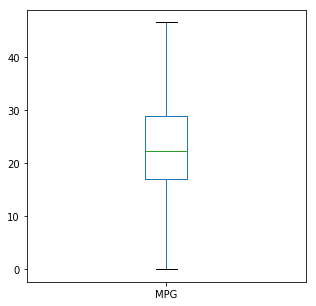

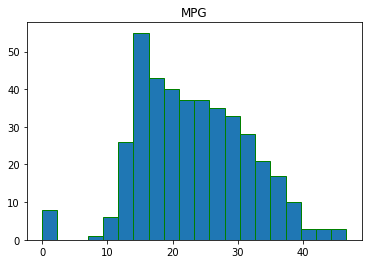

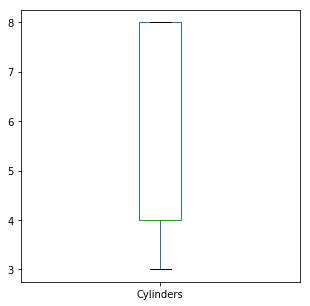

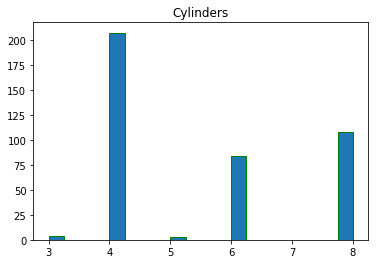

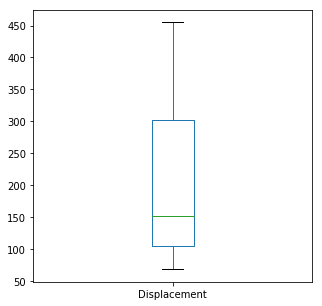

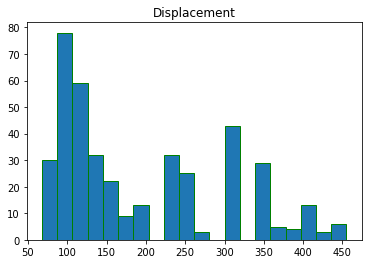

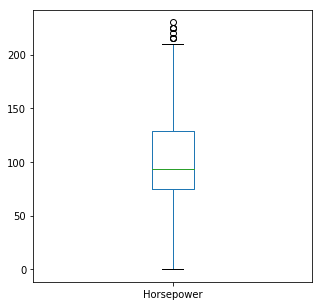

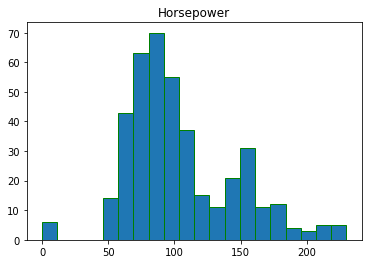

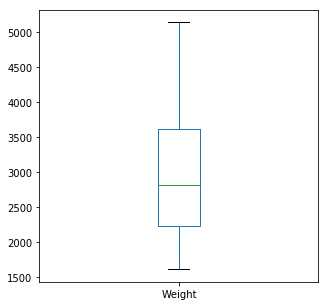

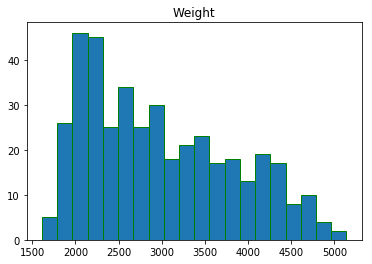

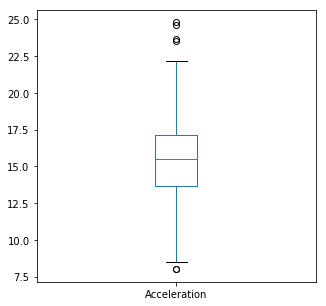

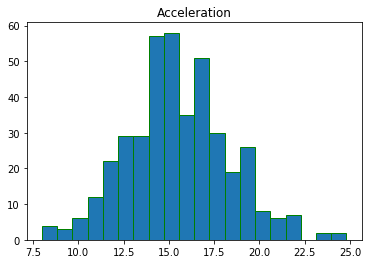

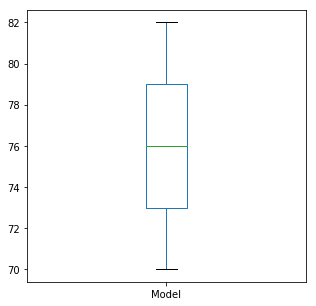

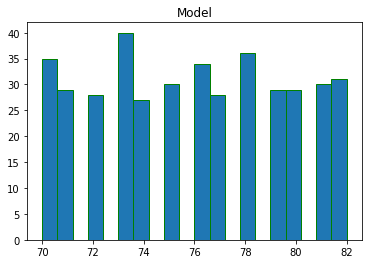

Graphs of Categorical variables :
Cannot plot the graph for the feature variable Car
Cannot plot the graph for the feature variable Origin
 
 Outlier Analysis : 
       Variable  Count  % of Outliers
1     Cylinders    0.0       0.000000
2  Displacement    0.0       0.000000
3    Horsepower    8.0       1.970443
4        Weight    0.0       0.000000
5  Acceleration    6.0       1.477833
6         Model    0.0       0.000000

 There is no missing values in your data 



In [16]:


numcat(cars)


missing_values(cars)




Numerical Features are: 

['id', 'price', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'yr_built', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
Categorical Features are: 

['date', 'bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade', 'yr_renovated', 'zipcode']
Do you want to save the images (Y/N)  : N
Graphs of Numerical variables :


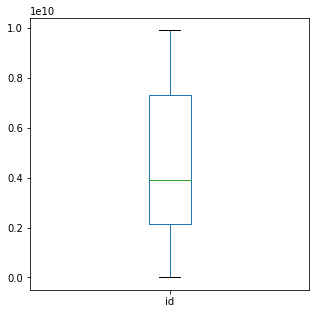

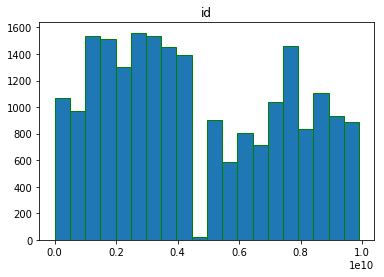

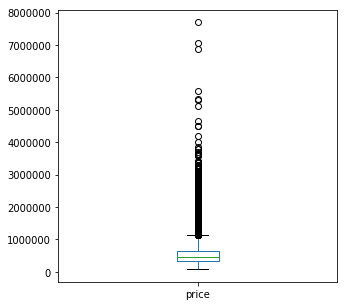

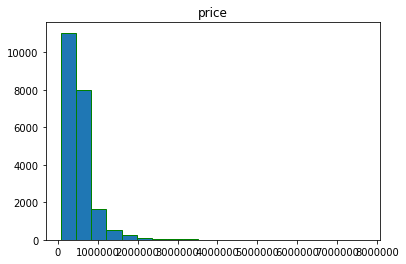

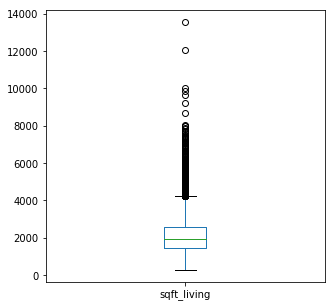

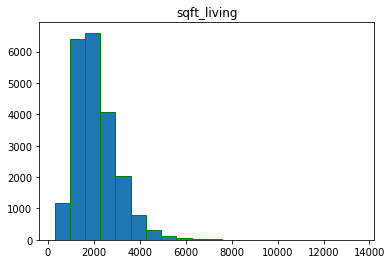

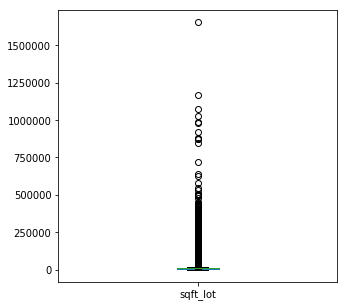

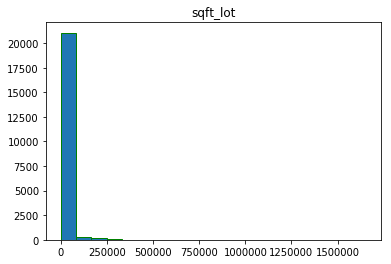

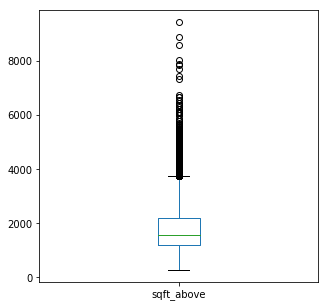

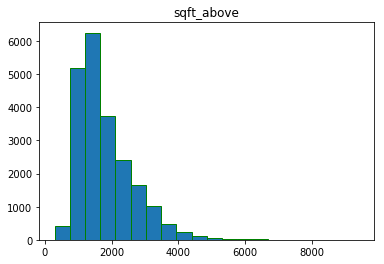

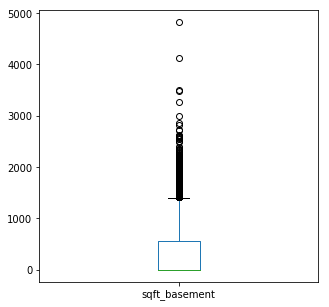

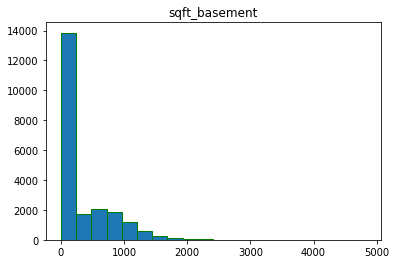

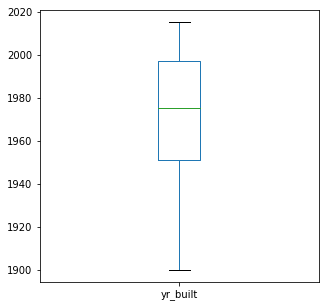

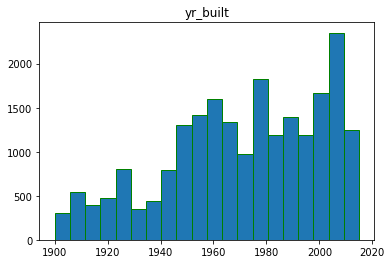

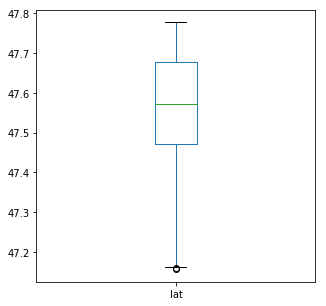

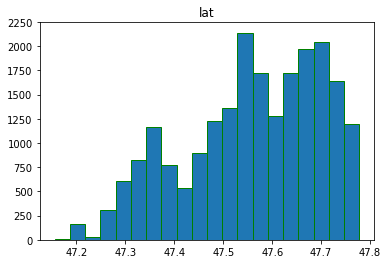

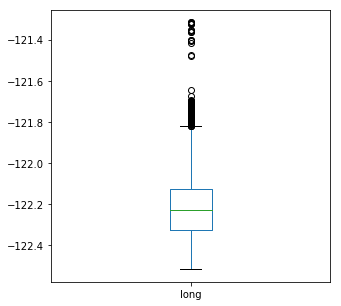

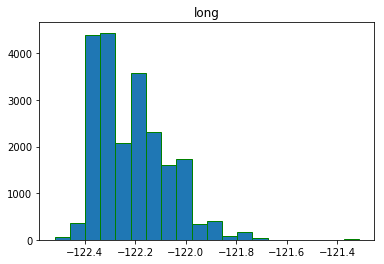

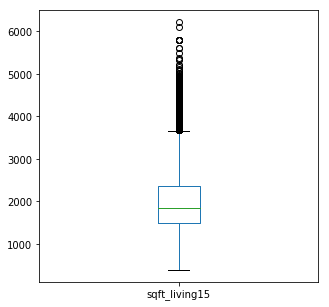

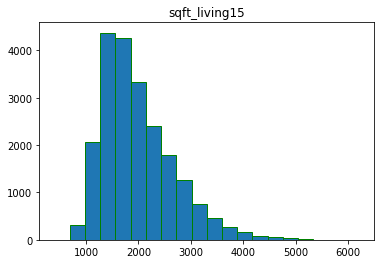

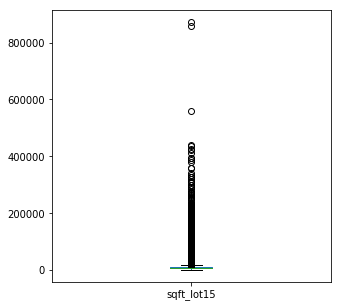

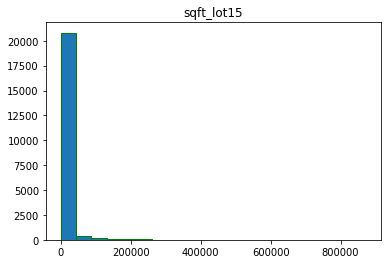

Graphs of Categorical variables :


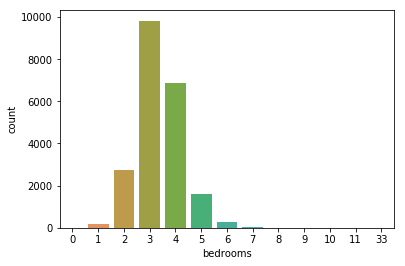

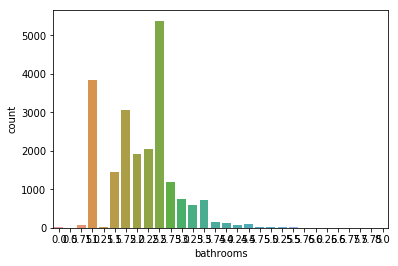

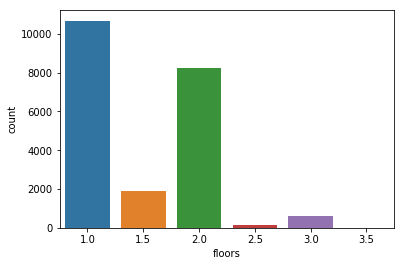

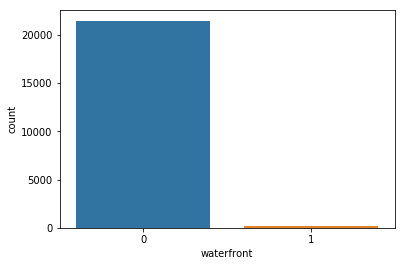

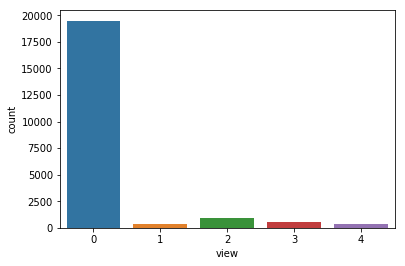

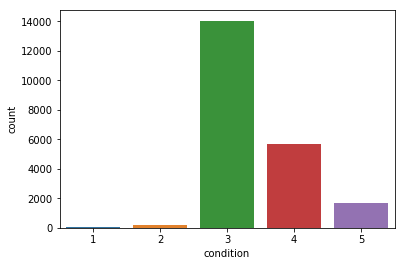

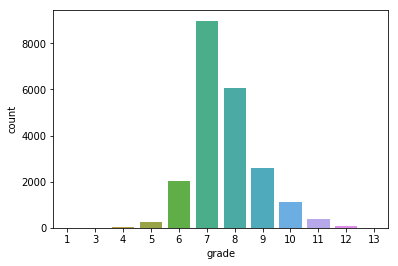

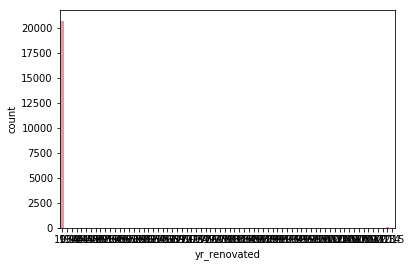

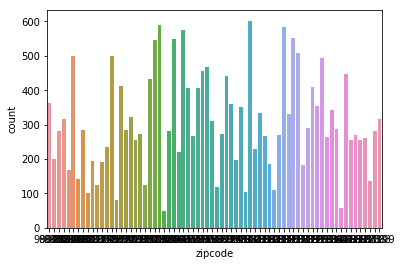

 
 Outlier Analysis : 
         Variable   Count  % of Outliers
1           price  1146.0       5.302364
2     sqft_living   572.0       2.646555
3        sqft_lot  2425.0      11.220099
4      sqft_above   611.0       2.827002
5   sqft_basement   496.0       2.294915
6        yr_built     0.0       0.000000
7             lat     2.0       0.009254
8            long   256.0       1.184472
9   sqft_living15   544.0       2.517004
10     sqft_lot15  2194.0      10.151298


In [17]:
numcat(house)

In [12]:

num=['id', 'price', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement','sqft_lot15']
outliers_imputation(house,num)

NameError: name 'num' is not defined


 Features having missing values: 

   % of missing values  Count    Variable       type
0             2.476415  105.0   education  numerical
1             0.683962   29.0  cigsPerDay  numerical
2             1.250000   53.0      BPMeds  numerical
3             1.179245   50.0     totChol  numerical
4             0.448113   19.0         BMI  numerical
5             0.023585    1.0   heartRate  numerical
6             9.150943  388.0     glucose  numerical

 White horizontal lines in the Graph represents the missing values : 



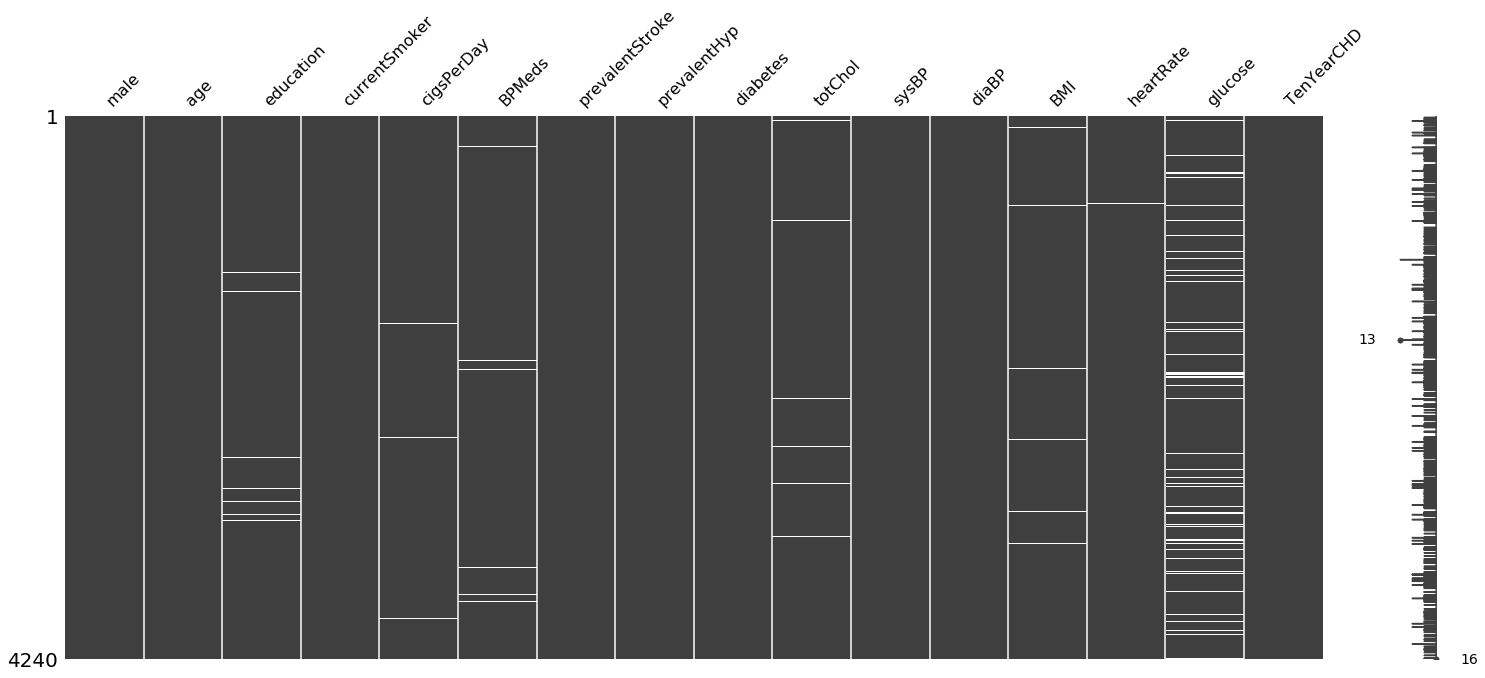

Note:

 Method for imputing missing values in this package: 
 1. Drop the missing value records 
 2. Mean imputation 
 3. Median imputation 
 4.Mode imputation  

The variable "education" is numerical so please choose how to impute its missing values? 
 1. Drop the missing value records 
 2. Mean imputation 
 3. Median imputation
Please enter any one option from (1,2,3):1

 Graph after imputing missing values: 



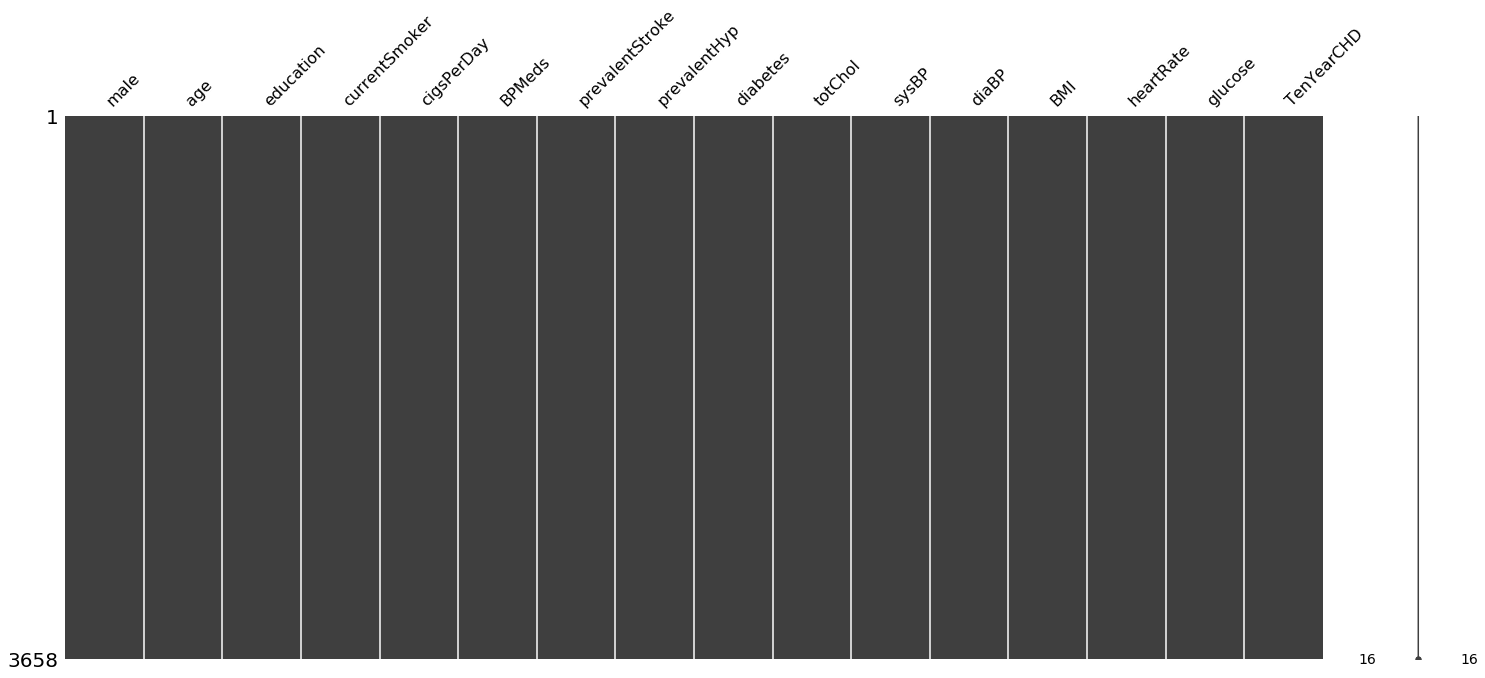

In [9]:
missing_values(fram)

In [19]:
cars.head()

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
0,Chevrolet Chevelle Malibu,18.0,8,307.0,130,3504,12.0,70,US
1,Buick Skylark 320,15.0,8,350.0,165,3693,11.5,70,US
2,Plymouth Satellite,18.0,8,318.0,150,3436,11.0,70,US
3,AMC Rebel SST,16.0,8,304.0,150,3433,12.0,70,US
4,Ford Torino,17.0,8,302.0,140,3449,10.5,70,US
